# Mammographic Mass Classification


In [387]:
## Mammography is the most effective method for breast cancer screening available today. 
## The classification of mammographic masses will be based on benign or malignant.
## Benign is when the tumor doesn’t invade other tissues whereas malignant does spread
## A couple of Classification algorithms will be tested here: 
## SVM, Logistic Regression, Decision Trees, Random Forest, Naive Bayes, Artificial Neural Network ..
##

# IMPORT THE NECESSSARY PACKEGES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [388]:
# Input dataset into a dataframe

input_file = 'mammographic_masses.data.txt'
masses_data = pd.read_csv(input_file, names = ['BI-RADS','Age','Shape','Margin','Density','Severity'], usecols = ['Age','Shape','Margin','Density','Severity'],na_values='?')
masses_data.head(10)

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1
5,65.0,1.0,NaN,3.0,0
6,70.0,NaN,NaN,3.0,0
7,42.0,1.0,NaN,3.0,0
8,57.0,1.0,5.0,3.0,1
9,60.0,NaN,5.0,1.0,1


In [389]:
# Get a description about the data

masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [390]:
# Let's Drop NAN values from our dataframe

masses_data = masses_data.dropna()

# Or we can Change NaN values with mean values fromthe same column:

# for column in masses_data.columns:
#     masses_data[column] = masses_data[column].replace(0, np.NaN)
#     mean = int(masses_data[column].mean(skipna=True))
#     masses_data[column] = masses_data[column].replace(np.NaN, mean)
    
masses_data.describe()

,Age,Shape,Margin,Density,Severity
count,831.000000,831.000000,831.000000,831.000000,831.000000
mean,55.777377,2.783394,2.814681,2.915764,0.484958
std,14.663528,1.242331,1.566771,0.350737,0.500075
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,46.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


In [391]:
# Create two vectors: X containing input features ( first four columns ) 
#                     Y containing target variable ('the severity' column)

features = list(masses_data.columns[:4])
X = masses_data[features].values
print('features:%s' %features)

labels = list(masses_data.columns[4:])
y = masses_data[labels].values
y = y.ravel()
print('labels:%s' %labels)


features:['Age', 'Shape', 'Margin', 'Density']
labels:['Severity']


In [392]:
# Scale the input features to normalise the data
# The data transformed will have a mean value of 0 and standard deviation of 1

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.76580356  0.17445989  1.39563127  0.24031298]
 [ 0.15166622  0.97988304  1.39563127  0.24031298]
 [-1.89545824 -1.43638642 -1.15892729  0.24031298]
 ...
 [ 0.56109111  0.97988304  1.39563127  0.24031298]
 [ 0.69756608  0.97988304  1.39563127  0.24031298]
 [ 0.42461615  0.17445989  0.11835199  0.24031298]]


In [393]:
# Create training and testing datasets

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0) 

## Decision Tree Classifier

In [394]:
# Build the model Decision Tree classifier using the trainning set

dtc = tree.DecisionTreeClassifier(random_state=0)

# fit the model
dtc = dtc.fit(X_train, y_train)

# then predict the values of the features test set

y_pred = dtc.predict(X_test)
print(y_pred)

# Calculate the accuracy of the prediction on test samples
#The function score() can be used directly to compute the accuracy of prediction on the test set
# ok as a result: 77%, for using the model with its default parameters!!
print(dtc.score(X_test, y_test))

## We group the results to a new dictionary and so on for each classifier to compare them at the end

# We initialize the list of dictionaries (each dictionary will contain a model label with the predicted results & accuracy)
models=[] 

model = {}
model['label'] = 'Decision Tree'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0
 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0
 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0]
0.7740384615384616


In [395]:
from sklearn import metrics

# ROC curve
# we use Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality using cross-validation

def createROC(y_test, y_pred):
    
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f%%'% (roc_auc*100))
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    plt.show()
    

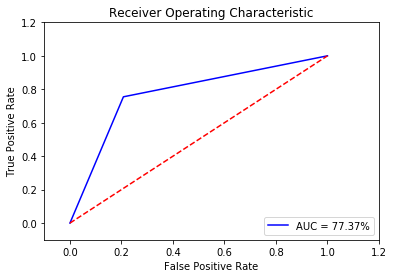

In [396]:
createROC(y_test, y_pred)

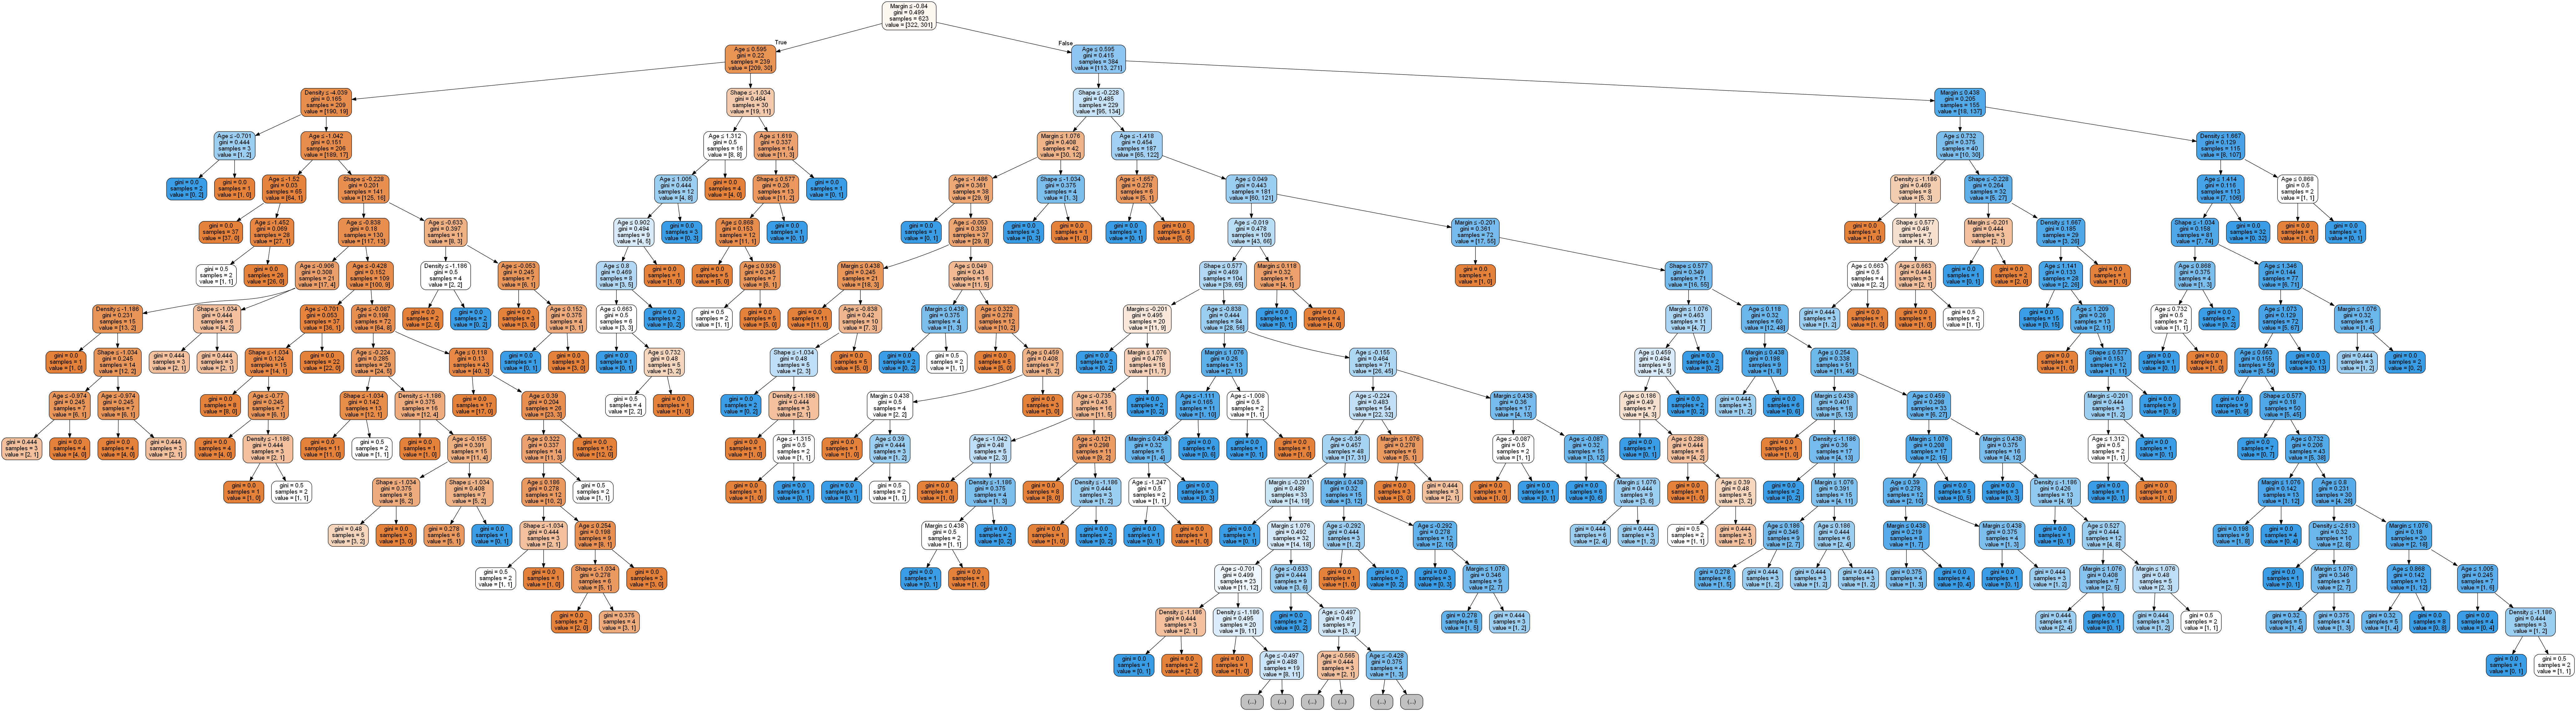

In [397]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()

# Get the dot graph of our decision tree
tree.export_graphviz(dtc, out_file=dot_data, 
                     feature_names=features,
                     filled=True, rounded=True,
                     special_characters=True, max_depth=15)

# Convert this dot graph into an image
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# make sure you have graphviz installed and set in Path of your system
Image(graph.create_png())


In [398]:
# K-Fold Cross Validation:

# One of cross-validation strategies is to call the cross_val_score helper function on the estimator and the dataset
# In this model, we will estimate the accuracy Decision Tree by spliting the data, fitting the model and 
# compiling cv=10 consecutive times (with different splits each time)
# k-Fold cross-validation divide all the samples in k groups 'folds'. The prediction function is learned using (k-1) folds
# and the remaining fold is used for testing

dtc = tree.DecisionTreeClassifier(random_state=0)

# cross_val_score() function evaluates score using validation method to avoid any kind of overfitting
scores = model_selection.cross_val_score(dtc, X, y, cv=10)
print(scores)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[0.71428571 0.75       0.72619048 0.73493976 0.78313253 0.69879518
 0.72289157 0.75903614 0.7804878  0.68292683]
Accuracy: 0.74 (+/- 0.06)


 ## Random Forest Classifier

In [399]:
# Build the model of random forest classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)

# Fit the model
rfc = rfc.fit(X_train, y_train)

# Predict the results
y_pred = rfc.predict(X_test)

# Evaluates the accuracy of our prediction on the test set
scores = model_selection.cross_val_score(rfc, X, y, cv=10)
print(scores)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
model = {}
model['label'] = 'Random Forest'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.70238095 0.80952381 0.78571429 0.73493976 0.80722892 0.72289157
 0.74698795 0.78313253 0.7804878  0.69512195]
Accuracy: 0.76 (+/- 0.08)


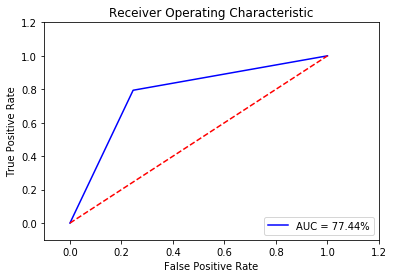

In [400]:
createROC(y_test, y_pred)

## SVM

### 1 - Linear Kernel 

In [401]:

from sklearn import svm

# Build the model svm
svc = svm.SVC(kernel='linear', C=1, gamma='scale')

# Fit the model
svc = svc.fit(X_train, y_train)

# Predict the results 
y_pred = svc.predict(X_test)

# Evaluates the accuracy of our prediction on the test set
scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
model = {}
model['label'] = 'SVM - Linear Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.71428571 0.77380952 0.85714286 0.80722892 0.84337349 0.71084337
 0.79518072 0.80722892 0.90243902 0.74390244]
Accuracy: 0.80 (+/- 0.12)


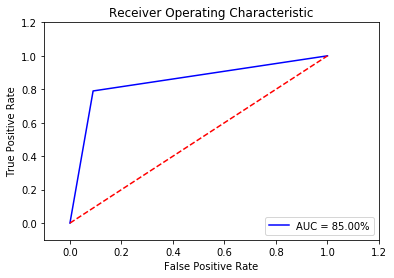

In [402]:
createROC(y_pred, y_test)

### 2 - Poly Kernel

In [403]:
# Build the model SVM-Poly kernel
svc = svm.SVC(kernel='poly', C=1, gamma='scale')

# Fit the model
svc = svc.fit(X_train, y_train)

# Predict the results
y_pred = svc.predict(X_test)

# Evaluates the accuracy of our prediction on the test set
scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
model = {}
model['label'] = 'SVM - Poly Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.76190476 0.77380952 0.86904762 0.79518072 0.84337349 0.71084337
 0.75903614 0.78313253 0.86585366 0.74390244]
Accuracy: 0.79 (+/- 0.10)


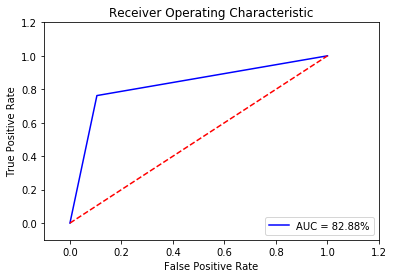

In [404]:
createROC(y_pred, y_test)

### 3 - RBF Kernel

In [405]:
# Build the model SVM-RBF Kernel
svc = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Fit the model
svc = svc.fit(X_train, y_train)

# Predict the results
y_pred = svc.predict(X_test)

# Evaluates the accuracy of our prediction on the test set
scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
model = {}
model['label'] = 'SVM - RBF Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.76190476 0.79761905 0.85714286 0.80722892 0.86746988 0.73493976
 0.77108434 0.78313253 0.86585366 0.76829268]
Accuracy: 0.80 (+/- 0.09)


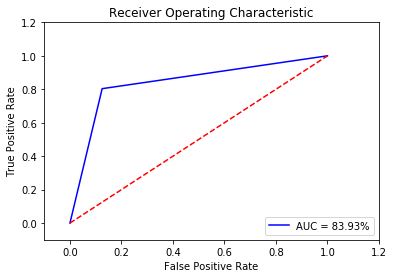

In [406]:
createROC(y_pred, y_test)

### 4 - Sigmoid Kernel

In [407]:
# Build the model svm-sigmoid
svc = svm.SVC(kernel='sigmoid', C=1, gamma='scale')

# Fit the model
svc = svc.fit(X_train, y_train)

# Predict the results
y_pred = svc.predict(X_test)

# Evaluates the accuracy of our prediction on the test set
scores = model_selection.cross_val_score(svc, X, y, cv=10)
print(scores)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
model = {}
model['label'] = 'SVM - Sigmoid Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.67857143 0.67857143 0.75       0.72289157 0.74698795 0.72289157
 0.73493976 0.78313253 0.70731707 0.75609756]
Accuracy: 0.73 (+/- 0.06)


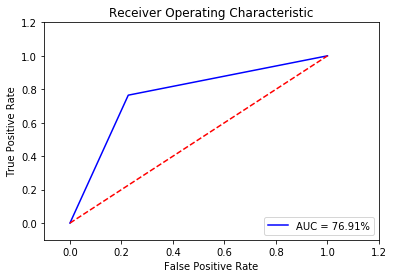

In [408]:
createROC(y_pred, y_test)

 ## Naive Bayes

In [409]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB


#  Scale the input features to normalize the data within a particular range
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Build the naive bayes model
nb = MultinomialNB()

# Split our data into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the model
nb.fit(X_train, y_train)

# Predict the results
y_pred = nb.predict(X_test)

# Calculate the accuracy of the prediction using score()
nb.score(X_test, y_test)

# Evaluates the accuracy of our prediction on the test set using cross validation
scores = model_selection.cross_val_score(nb, X, y, cv=10)
print(scores)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
model = {}
model['label'] = 'Naive Bayes'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.73809524 0.76190476 0.80952381 0.8313253  0.8313253  0.75903614
 0.71084337 0.75903614 0.91463415 0.70731707]
Accuracy: 0.78 (+/- 0.12)


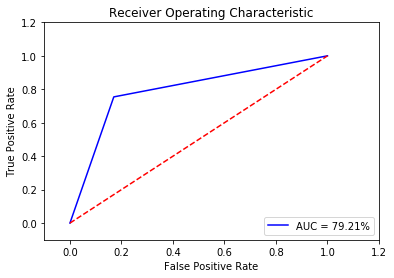

In [410]:
createROC(y_pred, y_test)

## Logistic Regression

In [411]:
from sklearn import linear_model

# Build the logistic regression model
lr = linear_model.LogisticRegression(C=1e5, solver='lbfgs')

# Fit the model
lr = lr.fit(X_train, y_train)

# Predict the results
y_pred = lr.predict(X_test)

# Evaluates the accuracy of our prediction on the test set
scores = model_selection.cross_val_score(lr, X, y, cv=10)
print(scores)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
model = {}
model['label'] = 'Logistic Regression'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.75       0.76190476 0.86904762 0.81927711 0.8313253  0.72289157
 0.78313253 0.8313253  0.8902439  0.79268293]
Accuracy: 0.81 (+/- 0.10)


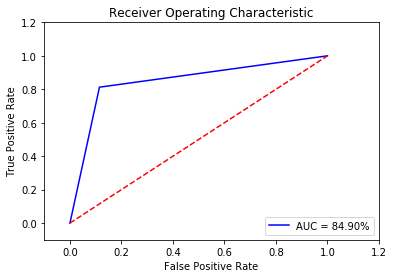

In [412]:
createROC(y_pred, y_test)

## K-NN: K-Nearest Neighbor

In [413]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Define the model

# math.sqrt(len(y_test)) = 14.42 we don't want an even number '14' for our neighbors to be voting .. 
# we choose an odd one '13' instead
# p is the power parameter to define the metric used --> euclidian
knn = KNeighborsClassifier(n_neighbors=13, p=2, metric='euclidean')

# Fit the model
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

# Evaluates the accuracy of our prediction on the test set
scores = model_selection.cross_val_score(knn, X, y, cv=10)
print(scores)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
model = {}
model['label'] = 'KNN - K-Nearest Neighbor'
model['pred'] = y_pred
model['acc'] = accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

[0.72619048 0.76190476 0.82142857 0.75903614 0.86746988 0.71084337
 0.79518072 0.78313253 0.84146341 0.73170732]
Accuracy: 0.78 (+/- 0.10)


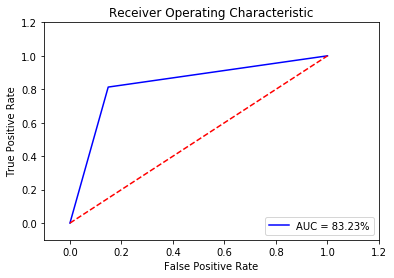

In [414]:
createROC(y_pred, y_test)

## Artificial Neural Network

In [415]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

In [416]:
ann = Sequential()

ann.add(Dense(128, input_dim=4, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(64, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(32, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(16, kernel_initializer='normal', activation='relu'))
ann.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = ann.fit(X_train, y_train, batch_size=10, epochs=100, verbose=2)

Epoch 1/100
 - 9s - loss: 0.6206 - acc: 0.7384
Epoch 2/100
 - 0s - loss: 0.4875 - acc: 0.7913
Epoch 3/100
 - 0s - loss: 0.4725 - acc: 0.7801
Epoch 4/100
 - 0s - loss: 0.4621 - acc: 0.7817
Epoch 5/100
 - 0s - loss: 0.4641 - acc: 0.7897
Epoch 6/100
 - 0s - loss: 0.4631 - acc: 0.7945
Epoch 7/100
 - 0s - loss: 0.4580 - acc: 0.7978
Epoch 8/100
 - 0s - loss: 0.4602 - acc: 0.7945
Epoch 9/100
 - 0s - loss: 0.4530 - acc: 0.8010
Epoch 10/100
 - 0s - loss: 0.4562 - acc: 0.7961
Epoch 11/100
 - 0s - loss: 0.4405 - acc: 0.7994
Epoch 12/100
 - 0s - loss: 0.4536 - acc: 0.8010
Epoch 13/100
 - 0s - loss: 0.4586 - acc: 0.8106
Epoch 14/100
 - 0s - loss: 0.4509 - acc: 0.7961
Epoch 15/100
 - 0s - loss: 0.4500 - acc: 0.8026
Epoch 16/100
 - 0s - loss: 0.4542 - acc: 0.8058
Epoch 17/100
 - 0s - loss: 0.4536 - acc: 0.8042
Epoch 18/100
 - 0s - loss: 0.4485 - acc: 0.8058
Epoch 19/100
 - 0s - loss: 0.4519 - acc: 0.8154
Epoch 20/100
 - 0s - loss: 0.4563 - acc: 0.8058
Epoch 21/100
 - 0s - loss: 0.4529 - acc: 0.8058
E

In [424]:
# Evaluates the accuracy of our prediction on the test set
score = ann.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# Predict the results
y_pred = ann.predict(X_test)

## Adding the results to a new dictionary to compare at the end
model = {}
model['label'] = 'ANN - Artificial Neural Network'
model['pred'] = y_pred
model['acc'] = metrics.roc_auc_score(y_test, y_pred)#accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

Test Loss: 0.4569360797221844
Test Accuracy: 0.8317307692307693


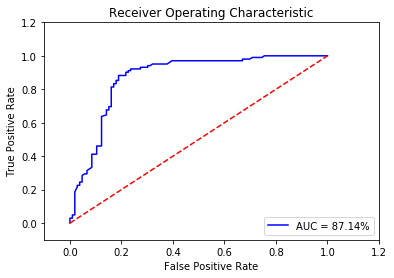

In [425]:

createROC(y_test, y_pred)


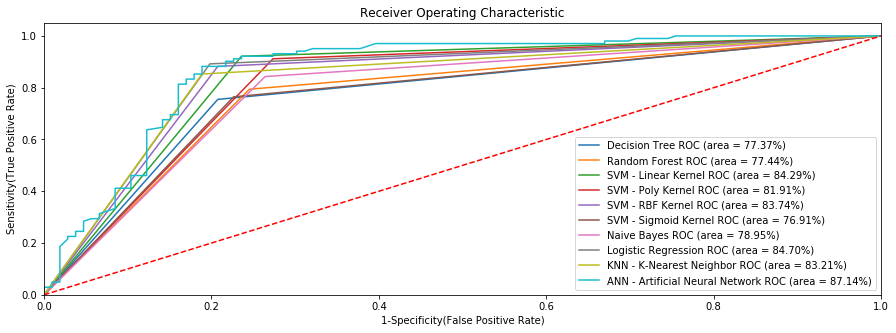

In [426]:
## CReate graph comparaison between classifiers

## ROC curves for all classifiers 

plt.figure(figsize = (15, 5))

for m in models:
    mod = m['label']
    y_pred = m['pred']
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    # Calculate Accuracy of the curve to display on the plot
    auc = metrics.auc(fpr, tpr)#metrics.roc_auc_score(y_test, y_pred)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f%%)' % (m['label'], auc*100))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# Display
plt.show()   
    

In [428]:
# Checking our list of dictionaries
print(len(models))
print(models[len(models)-1]['acc'])

# This work should be pushed further by focusing more on deep learning algorithms with some tuning  ...
...

10
0.871392896781354
